##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 1 DO LABORATORIUM 5</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Sztuczne sieci neuronowe</h1>
    <h1 style = "font-size:24px">Tomasz Neumann</h1>
    <h3 style = "font-size:21px">Klasyfikacja wieloklasowa, wieloetykietowa i wielowyjściowa w Scikit-Learn</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 5. Przykład 1

Klasyfikatory wieloklasowe (wielomianowe) służą do rozróżniania większej liczby klas. Niektóre algorytmy (takie jak klasyfikatory SGD, klasyfikatory losowego lasu lub naiwne klasyfikatory bayesowskie) są w stanie natywnie zajmować się wieloma klasami naraz. W przypadku wektorów nośnych czy klasyfikatorów regresji logistycznej mają charakter typowo binarny. Istnieje jednak wiele strategii, dzięki którym możemy przeprowadzać klasyfikację wieloklasową przy użyciu wielu klasyfikatorów binarnych.

Jednym ze sposobów stworzenia systemu klasyfikującego 10 klas obrazów cyfr (od 0 do 9) polega na wyuczeniu 10 klasyfikatorów binarnych, po jednym na każdą cyfrę. Następnie na etapie klasyfikacji obrazu uzyskujemy wynik z każdego klasyfikatora dla danej cyfry i wybieramy klasę, która uzyskała najwyższy wynik. Jest to tzw. strategia jeden przeciw reszcie (<i>one-versus-rest — OvR</i> lub  <i>one-versus-all — OvA</i>). Jeszcze innym rozwiązaniem jest wyuczenie klasyfikatora binarnego dla każdej pary cyfr: jeden rozpoznaje zera i jedynki, drugi — zera i dwójki, jeszcze inny — jedynki i dwójki itd. Jest to strategia jeden przeciw jednemu (<i>one-versus-one — OvO</i>). Jeśli masz do czynienia z $N$ klasami, musisz wytrenować $N\times(N–1)/2$ klasyfikatorów. W przypadku zestawu danych MNIST oznacza to wyuczenie
45 klasyfikatorów binarnych.

Zaletą strategii <i>OvO</i> jest fakt, że każdy klasyfikator musi zostać wytrenowany jedynie wobec części zbioru uczącego składającego się z obydwu porównywanych klas. Pewne algorytmy nie skalują się zbyt dobrze do rozmiarów zbioru uczącego np. maszyna wektórów nośnych. W takim przypadku preferowane jest stosowanie strategii OvO, ponieważ uczenie wielu klasyfikatorów wobec niewielkich zbiorów danych przebiega szybciej niż trenowanie kilku klasyfikatorów wobec dużych zbiorów przykładów. Jednakże w przypadku większości klasyfikatorów binarnych zalecane jest korzystanie ze strategii <i>OvR</i>.

Moduł Scikit-Learn pozwala zastosować strategię <i>OvO</i> lub <i>OvR</i>, poprzez wykorzystanie klas <i>OneVsOneClassifier</i> lub <i>OneVsRestClassifier</i>. Wystarczy stworzyć ich wystąpienie i przekazać konstruktorowi klasyfikator (nie musi być on nawet binarny). Poniższy kod przykładu stworzy klasyfikator wieloklasowy (na podstawie klasyfikatora <i>SVC</i>) przy użyciu strategii <i>OvR</i>.

In [2]:
#import bibliotek i danych
import keras
import tensorflow as tf
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
#zainicjowanie modelu OvR
#### UWAGA: trening trwa bardzo długo dlatego zaleca się jego wykonanie poza zajęciami i sprawdzenie rezultatów
#### W celu testów odkomentuj poniższe linijki
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn import svm
#ovr_clf = OneVsRestClassifier(svm.SVC())
#ovr_clf.fit(X_train, y_train)
#print(ovr_clf.predict(X_train))

Podobnie można postąpić z klasyfikatorem SGDClassifier

In [4]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(n_jobs=-1)
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict(X_train))

KeyboardInterrupt: 

Klasyfikatory SGD mogą bezpośrednio klasyfikować przykłady w sposób wieloklasowy, stąd też nie ma potrzeby wdrażania powyżej opisanych strategii. W takim zastosowaniu metoda <i>decision_function()</i> zwraca aktualnie po jednej wartości na jedną klasę.

In [65]:
i = 1244
test0 = X_train[i].reshape(1, 784)


# print(test0.shape)
# print(sgd_clf.predict(test0))
# print(sgd_clf.decision_function(X_train)[i][:])
# print('Przewidywana etykieta: ', sgd_clf.predict(X_train[i].reshape(1, 784))[0])
# print('Prawdziwa etykieta: ', y_train[i])

def find_first_number_in_arr(n, arr):
    for i, x in enumerate(arr):
        if x == n:
            return i


indexes_of_192237 = []
for x in [1, 9, 2, 2, 3, 7]:
    indexes_of_192237.append(find_first_number_in_arr(x, y_train))
print(indexes_of_192237)

for x in indexes_of_192237:
    real_number = y_train[[x]][0]
    test0 = X_train[x].reshape(1, 784)
    prediction = sgd_clf.predict(test0)[0]
    print(f"Liczba: {real_number}   prediction:{prediction}   correct?: {real_number == prediction}")




[3, 4, 5, 5, 7, 15]
Liczba: 1   prediction:1   correct?: True
Liczba: 9   prediction:9   correct?: True
Liczba: 2   prediction:2   correct?: True
Liczba: 2   prediction:2   correct?: True
Liczba: 3   prediction:3   correct?: True
Liczba: 7   prediction:7   correct?: True


Jak jednak przyjrzymy się dokładniej, przy wybraniu tego obrazu do przewidywań, klasyfikator pomylił się w ocenie, wykazując największy stopień pewności wyniku dla cyfry 9, a natępnie drugą wartość dla cyfry 8, która jest także wartością nieprawidłową. Jak widać wartość przewidywań dla cyfry 3 jest dużą liczbą ujemną stąd klasyfikator nie będzie brał tej opcji do końcowych przewidywań.

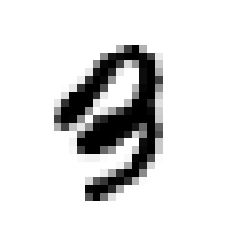

Prawdziwa etykieta:  3


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit_image = X_train[i].reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print('Prawdziwa etykieta: ', y_train[i])

Był to jednak specjalnie wybrany przykład niepoprawnej klasyfikacji. W celu oceny skuteczności tego klasyfikatora można posłuzyć się sprawdzianem krzyżowym z 5-cio krotną kroswalidacją.

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

array([0.87183333, 0.87916667, 0.88183333, 0.87008333, 0.8705    ])

Jak widać, wobec wszystkich podzbiorów testowych uzyskuję się wynik $87\%$, co porównując to wyniku losowego klasyfikatora ($10\%$) wypada dobrze. Aby uzyskać lepszy wynik można wykorzystać przeskalowanie danych za pomocą klasy <i>StandardScaler</i>

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5, scoring="accuracy", n_jobs=-1)

array([0.89808333, 0.89141667, 0.89758333, 0.893     , 0.90391667])

array([0.90283333, 0.89283333, 0.89633333, 0.895     , 0.9035    ])

uzyskując o około $3\%$ lepszy wynik niż wcześniej bez skalowania.

Dalszą analizę wyników można dokonywać za pomocą macierzy pomyłek. Należy wyliczyć prognozy za pomocą funkcji <i>cross_val_predict()</i>, a następnie wywołać funkcję <i>confusion_matrix()</i> (rzędy reprezentują rzeczywiste klasy, kolumny zaś - przewidywane klasy)

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5, n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred, )
print(conf_mx)

[[5579    0   16    8    9   46   36    6  222    1]
 [   0 6415   41   24    3   42    4    7  194   12]
 [  26   25 5235   92   70   28   64   41  368    9]
 [  26   18  112 5240    0  202   24   39  399   71]
 [  11   14   40   11 5235   11   33   18  309  160]
 [  27   18   25  166   53 4481   78   15  494   64]
 [  28   17   42    3   44   93 5550    7  134    0]
 [  18   10   53   28   50   15    4 5678  196  213]
 [  15   60   42   91    4  119   29    7 5443   41]
 [  20   19   31   60  124   39    1  173  358 5124]]


jak i stworzyć reprezentację graficzną tych liczb.

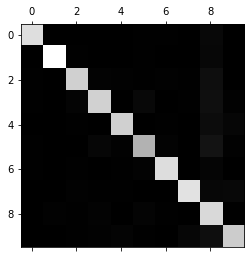

In [16]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Wartości w macierzy pomyłek prezentują się całkiem nieźle, gdyż większość obrazów znajduje się na głównej przekątnej, co oznacza, że zostały prawidłowo sklasyfikowane. Piątki wyglądają nieco ciemniej od pozostałych cyfr, co może oznaczać, że w zbiorze danych znajduje się mniej obrazów piątek lub że klasyfikator nie sprawuje się tak dobrze wobec piątek, jak w przypadku pozostałych cyfr. W rzeczywistości można zweryfikować obydwa stwierdzenia, jeżeli wyrysuje się diagram błędów.

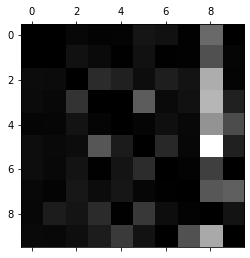

In [17]:
#podzielenie każdej wartości z macierzy pomyłek przez liczbę obrazów
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#Wypełnienie głównej przekątnej zerami, aby pozostały same błędy
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Kolumna reprezentująca klasę 8 jest dość jasna, co oznacza, że wiele obrazów zostało nieprawidłowo sklasyfikowanych jako ta właśnie cyfra. Jednak rząd klasy 8 nie wygląda tak źle, co oznacza, że zasadniczo większość ósemek jest prawidłowo klasyfikowanych.
Jak widać, macierz pomyłek nie jest zbyt symetryczna. Można również dostrzec, że trójki i piątki są często mylone (w obydwie strony).
Analiza macierzy pomyłek często dostarcza wskazówek pozwalających usprawnić klasyfikator. Można byłoby popracować nad zmniejszeniem liczby fałszywych ósemek tworząc nowe cechy bądź też dokonać wstępnego przetwarzania obrazów (korzystając z modułów Scikit-Image, Pillow lub OpenCV), aby uwypuklić pewne wzorce.

<b>Klasyfikacja wieloetykietowa</b> (multilabel classification)

Powyższy kod analizował pojedyncze przykłady i przydzielał je wyłącznie do jednej klasy. W niektórych sytuacjach
może zachodzić potrzeba, aby klasyfikator wyznaczał wiele klas dla jednego wystąpienia.

W tym celu zaimplemontowane zostaną dwie docelowe etykiety dla każdego obrazu cyfry. Niech pierwsza z nich określa, czy jest to duża liczba, zaś druga niech opisuje, że liczba jest nieparzysta. Następnie zostaje utworzone wystąpienie klasyfikatora <i>KNeighborsClassifier</i>, po czym jest on uczony za pomocą tablicy zawierającej wiele docelowych elementów

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# y_train_large = (y_train >= 7)
# y_train_odd = (y_train % 2 == 1)
# y_multilabel = np.c_[y_train_large, y_train_odd]
# knn_clf = KNeighborsClassifier(n_jobs=-1)
# knn_clf.fit(X_train, y_multilabel)

y_train_primary = np.isin(y_train, [2, 3, 5, 7])
y_train_by_3 = (y_train % 3 == 0)
y_multilabel = np.c_[y_train_primary, y_train_by_3]
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1)

oraz dokonywane są prognozy.

In [15]:
print(knn_clf.predict(X_train[0:7]))
print('Prawdziwa etykieta: ', y_train[0:7])

[[ True False]
 [False  True]
 [False False]
 [False False]
 [False  True]
 [ True False]
 [False False]]
Prawdziwa etykieta:  [5 0 4 1 9 2 1]


Jak widać prognoza do obrazu pierwszego, reprezentującego 5-tkę zgadza się - nie jest to wielka cyfra (większa od 6) oraz jest to cyfra nieparzysta. Aby jednak lepiej ocenić wydajność klasyfikatora można obliczyć F-Score dla poszczególnych etykiet (zakładając, że każda ma taką samą wagę), a następnie wyliczeniu średniej.

In [16]:
from sklearn.metrics import *

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=5, n_jobs=-1)
print(f1_score(y_multilabel, y_train_knn_pred, average="weighted"))

NameError: name 'cross_val_predict' is not defined

W celu nadania każdej etykiecie wagi równej jej współczynnikowi wsparcia (support) np. liczba próbek zawierających etykietę docelową, można użyć wyrażenia <i>average="weighted"</i>.

<b>Klasyfikacja wielowyjściowa</b>
Ostatnim rodzajem zadania klasyfikacyjnego jest klasyfikacja wielowyjściowa (<i>multioutput classification</i>). Jest to po prostu uogólnienie klasyfikacji wieloetykietowej, gdzie każda etykieta może być wieloklasowa tj. może mieć ponad dwie możliwe wartości. Można to przedstawić na systemie, który będzie usuwał szum z obrazów cyfr.
Danymi wejściowymi będą poprzednie obrazy, które będą zmodyfikowane poprzez dodanie dodatkowego szumu zaś na wyjściu należy spodziewać się obrazu cyfr w postaci zawierającej poziomy szarości poszczególnych pikseli (na jeden piksel przypada jedna etykieta, a każda z etykiet może mieć różne wartości z zakresu poziomów szarości od 0 do 255)

In [25]:
import matplotlib.pyplot as plt

noise = np.random.randint(0, 200, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 200, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

oraz wyświetlimy tak zmodyfikowany obraz.

Zaszumiony obraz


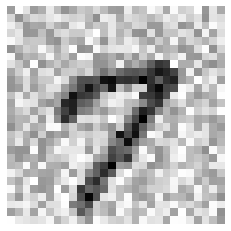

Prawdziwa etykieta:  7


In [26]:
def find_first_number_in_arr(n, arr):
    for i, x in enumerate(arr):
        if x == n:
            return i


number_7_index = find_first_number_in_arr(7, y_train)

print('Zaszumiony obraz')
plt.imshow(X_train_mod[number_7_index].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()
print('Prawdziwa etykieta: ', y_train[number_7_index])

Następnie wytrenowujemy klasyfikator na tak zmodyfikowanych danych wejściowych i analizujemy wyniki predykcji

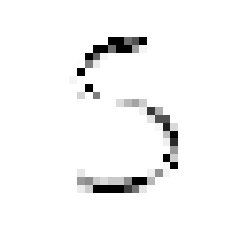

Prawdziwa etykieta:  7


In [27]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[number_7_index]])
plt.imshow(clean_digit.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()
print('Prawdziwa etykieta: ', y_train[number_7_index])

które nie zawsze muszą odzwierciedlać pierwotny stan naszej cyfry wobec wprowadzonego szumu.

# Zadania do wykonania (Do wyboru)

<p><b>Zadanie 1</b></p>
Wykonaj i oceń wynik klasyfikacji wieloklasowej cyfr ze zbioru MNIST wyłącznie dla cyfr znajdujących się w Twoim numerze albumu.
<p><b>Zadanie 2</b></p>
Dla przykładu klasyfikacji wieloetykietowej przeprowadź eksperymenty, aby klasyfikować liczby pierwsze i podzielne przez 3.
<p><b>Zadanie 3</b></p>
Dla przykładu klasyfikacji wielowyjściowej wykonaj dwa eksperymenty dla różnych przedziałów zaszumienia oraz przeprowadź testy dla cyfry będącej odpowiednikiem ostatniej cyfry z Twojego numeru albumu.  

![stopka.svg](stopka.svg)